In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create a TfidfVectorizer instance with default parameters
vectorizer = TfidfVectorizer()

corpus = [
    "The cat sat on the mat.",
    "Dogs are loyal animals.",
    "Cats are independent and curious.",
    "Dogs bark loudly.",
    "The mat was soft and warm."
]

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_matrix.toarray())

[[0.         0.         0.         0.         0.39985351 0.
  0.         0.         0.         0.         0.         0.32259929
  0.39985351 0.39985351 0.         0.64519858 0.         0.        ]
 [0.         0.55032913 0.44400208 0.         0.         0.
  0.         0.44400208 0.         0.         0.55032913 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.38898761 0.         0.38898761 0.         0.         0.48214012
  0.48214012 0.         0.48214012 0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.61418897 0.         0.
  0.         0.49552379 0.         0.61418897 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.36252618 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.36252618
  0.         0.         0.44934185 0.36252618 0.44934185 0.44934185]]


In [4]:
import numpy as np

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vec = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vec
    return embeddings

glove_path = 'glove.6B.100d.txt'  # update with your path
glove = load_glove_embeddings(glove_path)

# Compute average embeddings for each document
def get_doc_embedding(doc, glove):
    words = doc.lower().split()
    valid_words = [glove[word] for word in words if word in glove]
    if valid_words:
        return np.mean(valid_words, axis=0)
    else:
        return np.zeros(100)

glove_embeddings = np.array([get_doc_embedding(doc, glove) for doc in corpus])

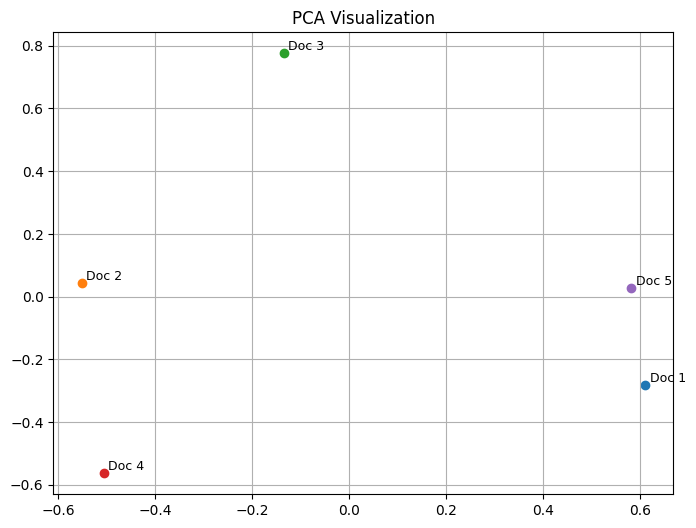

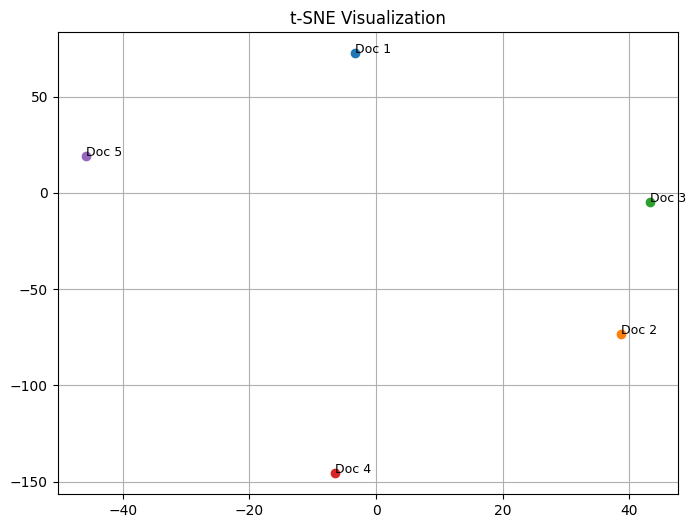

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize_embeddings(embeddings, labels, method='PCA'):
    if method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 't-SNE':
        reducer = TSNE(n_components=2, perplexity=3, random_state=42)
    
    reduced = reducer.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        x, y = reduced[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, label, fontsize=9)
    plt.title(f'{method} Visualization')
    plt.grid(True)
    plt.show()

# Visualize TF-IDF
visualize_embeddings(tfidf_matrix.toarray(), labels=[f'Doc {i+1}' for i in range(len(corpus))], method='PCA')

# Visualize GloVe
visualize_embeddings(glove_embeddings, labels=[f'Doc {i+1}' for i in range(len(corpus))], method='t-SNE')


In [8]:
from sklearn.datasets import fetch_20newsgroups

corpus = fetch_20newsgroups(categories=['sci.space'], remove=('headers', 'footers', 'quotes'))
# Preview data
print(len(corpus.data))
print(corpus.data[0])

c:\Users\anjil\miniconda3\envs\nlp\lib\site-packages\sklearn\datasets\_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5975967
  warnings.warn(f"Retry downloading from url: {remote.url}")


593

Any lunar satellite needs fuel to do regular orbit corrections, and when
its fuel runs out it will crash within months.  The orbits of the Apollo
motherships changed noticeably during lunar missions lasting only a few
days.  It is *possible* that there are stable orbits here and there --
the Moon's gravitational field is poorly mapped -- but we know of none.

Perturbations from Sun and Earth are relatively minor issues at low
altitudes.  The big problem is that the Moon's own gravitational field
is quite lumpy due to the irregular distribution of mass within the Moon.


In [9]:
import spacy

# Load english language model
nlp = spacy.load('en_core_web_sm')

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ["ner", "parser"]

# Custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if not t.is_punct and not t.is_space and t.is_alpha]

In [10]:
# Initialise tf-idf tokenizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

# Fit vectorizer to corpus
features = vectorizer.fit_transform(corpus.data)

c:\Users\anjil\miniconda3\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Initialise tf-idf tokenizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

# Fit vectorizer to corpus
features = vectorizer.fit_transform(corpus.data)

# What the matrix looks like
print(features)